In [1]:
import numpy as np
import pandas as pd 

In [2]:
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

In [3]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


## Arbitrary value imputation 

Replace NaN by arbitrary[random] value and 

It Should not be more frequently present, helps in finding importance of missing features i.e. choose outliers [max/min] values 

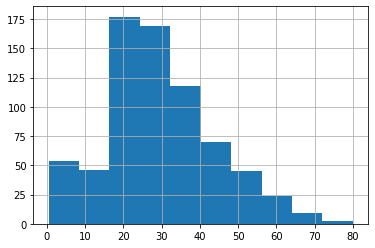

In [4]:
df['Age'].hist()

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
def fnc1(df, variable):
    df[variable + '_100'] = df[variable].fillna(100) 
    df[variable + '_0'] = df[variable].fillna(0) 

Adv: Captures importance of missing values | Disadv: Distorts distribution, hard to decide which values to use 

# Handling Categorical Features 

## Freq Category Imputation 

In [7]:
df=pd.read_csv('train_house.csv', usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])

In [8]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [9]:
df.shape

(1460, 4)

In [10]:
df.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [11]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [12]:
#Bsmt and garage have less missing values and we will replace them with the most occuring/frequent values 
#to maintain spread

In [13]:
df['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

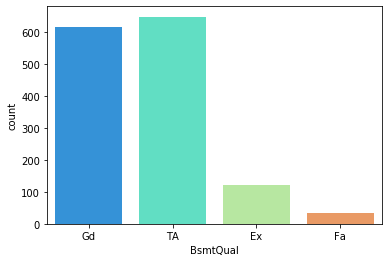

In [14]:
sns.countplot(x='BsmtQual', data=df, palette='rainbow')

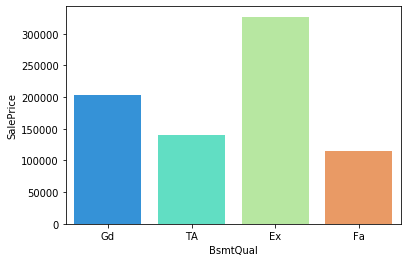

In [15]:
sns.barplot(x='BsmtQual',y='SalePrice', data=df,palette='rainbow', ci=None)

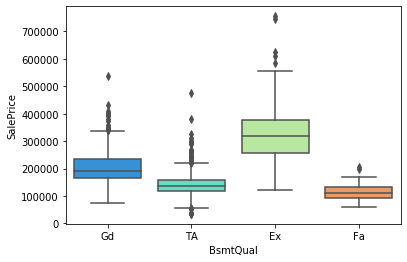

In [16]:
sns.boxplot(x='BsmtQual',y='SalePrice', data=df,palette='rainbow')

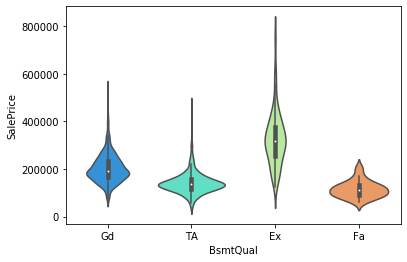

In [17]:
sns.violinplot(x='BsmtQual',y='SalePrice', data=df,palette='rainbow')

In [18]:
df['BsmtQual'].value_counts()[0]
#this returns the count of the most occuring value

649

In [19]:
df['BsmtQual'].value_counts().index[0]
#this returns the category of the most occuring value

'TA'

In [20]:
#this is most freq imputation 
df['BsmtQual'].fillna(df['BsmtQual'].value_counts().index[0], inplace=True)
df['FireplaceQu'].fillna(df['FireplaceQu'].value_counts().index[0], inplace=True)
df['GarageType'].fillna(df['GarageType'].value_counts().index[0], inplace=True)

In [21]:
df['BsmtQual'].value_counts()

TA    686
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

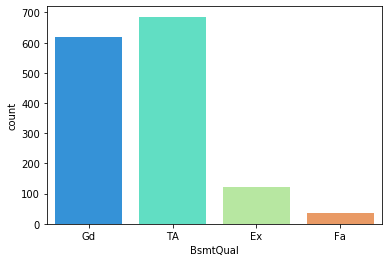

In [22]:
sns.countplot(x='BsmtQual', data=df, palette='rainbow')

In [23]:
df.isnull().mean() #all nulls are handled 

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

In [24]:
#we can also use 'Mode'

In [25]:
df['GarageType'].mode() #even this value can be directly used in fillna 

0    Attchd
dtype: object

Should not be done when we have higher % of missing values i.e. Fireplace has 50% missing values, if we replace it direclty then issue will be that it will change the relationship of variable with the output 

adv: easy, fast | disadv: over representation if there are many NaN, distorts relation between var and output 

## Adding a variable to capture NaN

same as continuous, create a new feature and fill with 0/1 as per the presence of nulls

## 